# Umass Amherst Project 

## Preprocessing, Data Analysis, Visualization, Machine Learning 

### By Fatima Sadjadpour

In [2]:
#Importing some libraries:

import numpy as np # for scientific computing
import pandas as pd # for data analysis & data processing 
import seaborn as sns # for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import statsmodels.api as sm

In [3]:
import os
os.getcwd()

'C:\\Users\\Faaty\\Documents\\UmassD\\Courses\\Fall 2020\\Pre Dissertion Research'

In [4]:
# Reading dataset
data1 = pd.read_csv('C:\\Users\\Faaty\\Documents\\UmassD\\Courses\\Fall 2020\\Pre Dissertion Research\\redatascience\\TCGA_coad.csv')

In [5]:
pd.set_option("max_columns", None)
data1

submitter_id.samples  age_at_initial_pathologic_diagnosis batch_number  \
0       TCGA-F4-6460-01A                                 51.0     123.74.0   
1       TCGA-A6-3807-01A                                 53.0      41.78.0   
2       TCGA-A6-3807-11A                                 53.0      41.78.0   
3       TCGA-AA-A01C-01A                                 75.0      33.79.0   
4       TCGA-A6-A566-01A                                 55.0     300.56.0   
..                   ...                                  ...          ...   
566     TCGA-AZ-4323-01A                                 37.0     138.78.0   
567     TCGA-A6-A56B-01A                                 57.0     300.56.0   
568     TCGA-D5-6541-01A                                 49.0     116.77.0   
569     TCGA-5M-AAT5-01A                                  NaN     422.38.0   
570     TCGA-5M-AATA-01A                                  NaN     422.38.0   

                                bcr bcr_followup_barcode  \
0    Nationwide Children's Hospital  TCGA-F4-6460-F29824   
1    Nationwide Children's Hospital   TCGA-A6-3807-F2546   
2    Nationwide Children's Hospital   TCGA-A6-3807-F2546   
3    Nationwide Children's Hospital  TCGA-AA-A01C-F37307   
4    Nationwide Children's Hospital  TCGA-A6-A566-F42248   
..                              ...                  ...   
566  Nationwide Children's Hospital  TCGA-AZ-4323-F19855   
567  Nationwide Children's Hospital  TCGA-A6-A56B-F45684   
568  Nationwide Children's Hospital  TCGA-D5-6541-F28627   
569  Nationwide Children's Hospital                  NaN   
570  Nationwide Children's Hospital                  NaN   

                        bcr_followup_uuid  submitter_id  \
0    C5664BD6-77BB-4B54-95E7-0253119610DE  TCGA-F4-6460   
1    0ac8de49-6a23-48b4-af74-8aaf2a64ca09  TCGA-A6-3807   
2    0ac8de49-6a23-48b4-af74-8aaf2a64ca09  TCGA-A6-3807   
3    46508480-8E1F-419E-BAF0-708998F1FF2A  TCGA-AA-A01C   
4    B606B322-10CC-448D-8676-D394D2E536CD  TCGA-A6-A566   
..                                    ...           ...   
566  d48d2369-d5d1-43a9-bc42-08696d05ce5e  TCGA-AZ-4323   
567  9057886A-BF48-4C84-BAA1-32D272E06D4D  TCGA-A6-A56B   
568  51177e35-3947-4f3c-88dc-2dbbfc7835c3  TCGA-D5-6541   
569                                   NaN  TCGA-5M-AAT5   
570                                   NaN  TCGA-5M-AATA   

    braf_gene_analysis_performed braf_gene_analysis_result  \
0                             NO                       NaN   
1                             NO                       NaN   
2                             NO                       NaN   
3                             NO                       NaN   
4                            NaN                       NaN   
..                           ...                       ...   
566                          NaN                       NaN   
567                           NO                       NaN   
568                           NO                       NaN   
569                          NaN                       NaN   
570                          NaN                       NaN   

     circumferential_resection_margin colon_polyps_present date_of_withdraw  \
0                                 NaN                   NO              NaN   
1                                 NaN                  YES              NaN   
2                                 NaN                  YES              NaN   
3                                 NaN                  NaN              NaN   
4                                 NaN                   NO              NaN   
..                                ...                  ...              ...   
566                               NaN                  NaN              NaN   
567                              15.0                  YES              NaN   
568                              30.0                  NaN              NaN   
569                               NaN                  NaN              NaN   
570                    

In [6]:
data1.dtypes

submitter_id.samples                    object
age_at_initial_pathologic_diagnosis    float64
batch_number                            object
bcr                                     object
bcr_followup_barcode                    object
                                        ...   
sample_type.samples                     object
sample_type_id.samples                   int64
shortest_dimension.samples             float64
state.samples                           object
tissue_type.samples                     object
Length: 120, dtype: object

In [7]:
data1.describe()

age_at_initial_pathologic_diagnosis  circumferential_resection_margin  \
count                           569.000000                         73.000000   
mean                             67.616872                         28.136301   
std                              12.968575                         33.458692   
min                              31.000000                          0.000000   
25%                              59.000000                          2.000000   
50%                              69.000000                         18.000000   
75%                              78.000000                         40.000000   
max                              90.000000                        165.000000   

       day_of_dcc_upload  day_of_form_completion  \
count         571.000000              510.000000   
mean           21.917688               13.494118   
std             1.258746               10.662484   
min             1.000000                1.000000   
25%            22.000000                3.000000   
50%            22.000000               10.000000   
75%            22.000000               24.000000   
max            22.000000               31.000000   

       days_to_initial_pathologic_diagnosis  kras_mutation_codon  \
count                                 569.0            25.000000   
mean                                    0.0            12.160000   
std                                     0.0             0.374166   
min                                     0.0            12.000000   
25%                                     0.0            12.000000   
50%                                     0.0            12.000000   
75%                                     0.0            12.000000   
max                                     0.0            13.000000   

       lymph_node_examined_count  month_of_dcc_upload  \
count                 547.000000           571.000000   
mean                   23.292505            11.982487   
std                    12.996280             0.295655   
min                     0.000000             7.000000   
25%                    15.000000            12.000000   
50%                    21.000000            12.000000   
75%                    28.000000            12.000000   
max                   109.000000            12.000000   

       month_of_form_completion  number_of_abnormal_loci  \
count                520.000000                67.000000   
mean                   7.913462                 1.074627   
std                    4.268698                 2.127122   
min                    1.000000                 0.000000   
25%                    3.000000                 0.000000   
50%                   10.000000                 0.000000   
75%                   12.000000                 0.500000   
max                   12.000000                 9.000000   

       number_of_first_degree_relatives_with_cancer_diagnosis  \
count                                         492.000000        
mean                                            0.182927        
std                                             0.485086        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                             0.000000        
max                                             3.000000        

       number_of_loci_tested  number_of_lymphnodes_positive_by_he  \
count              67.000000                           542.000000   
mean                4.955224                             2.086716   
std                 2.135081                             4.673622   
min                 0.000000                             0.000000   
25%                 5.000000                             0.000000   
50%                 5.000000                             0.000000   
75%                 5.000000                             2.000000   
max        

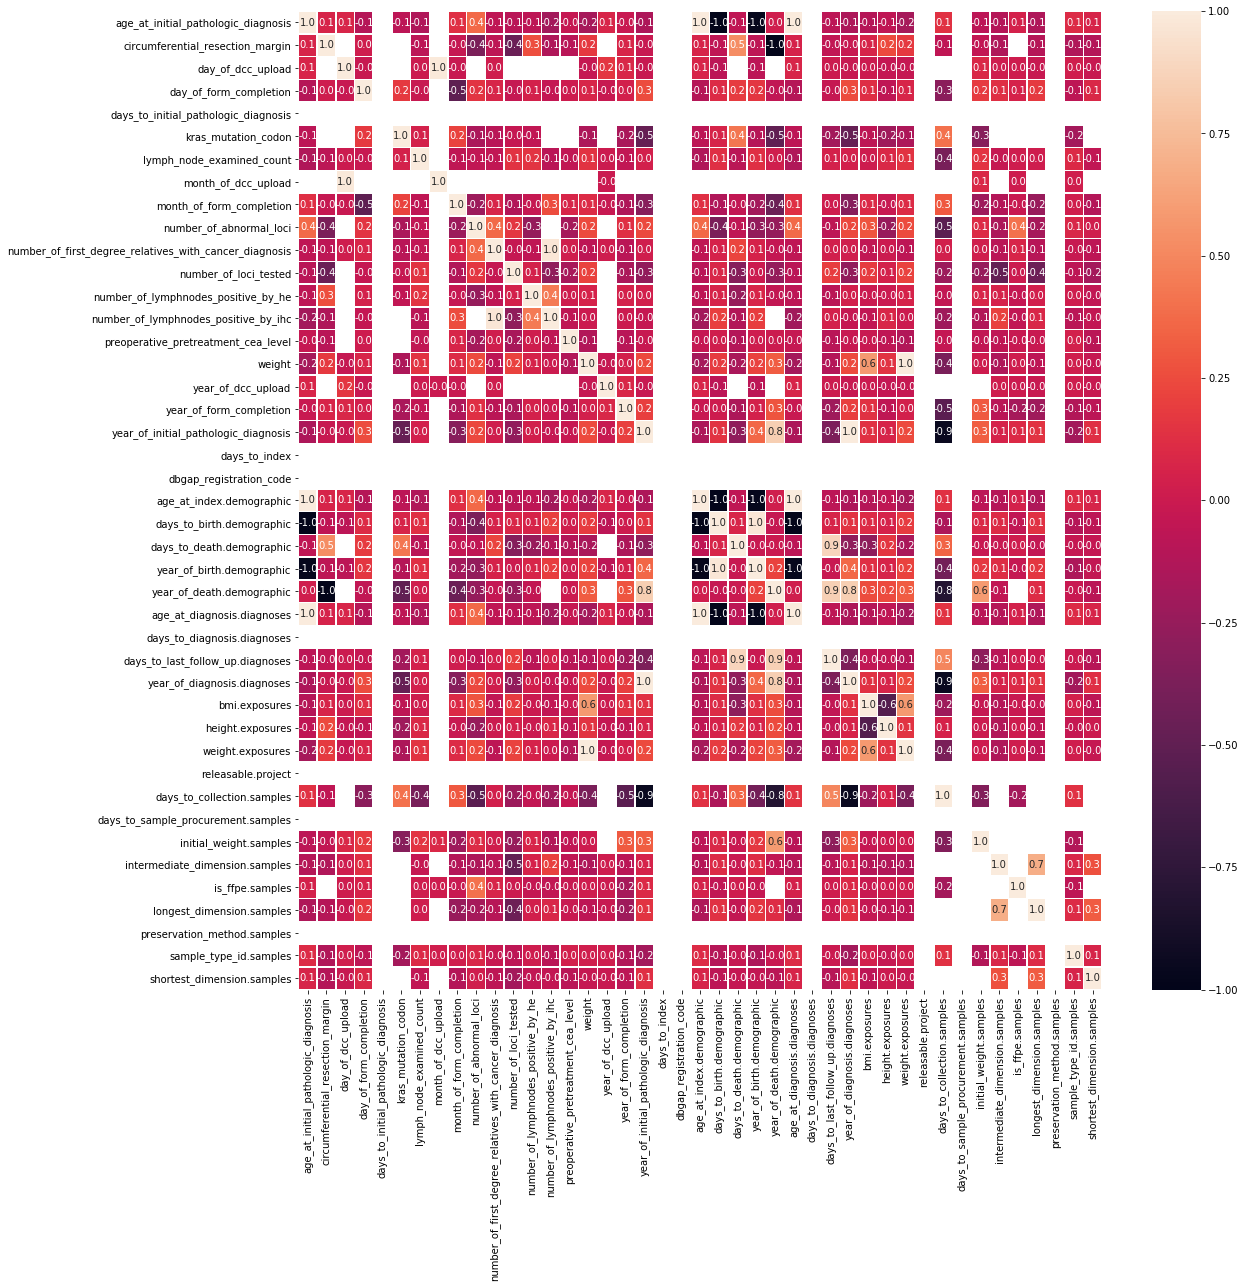

In [8]:
#correlation map
data1.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

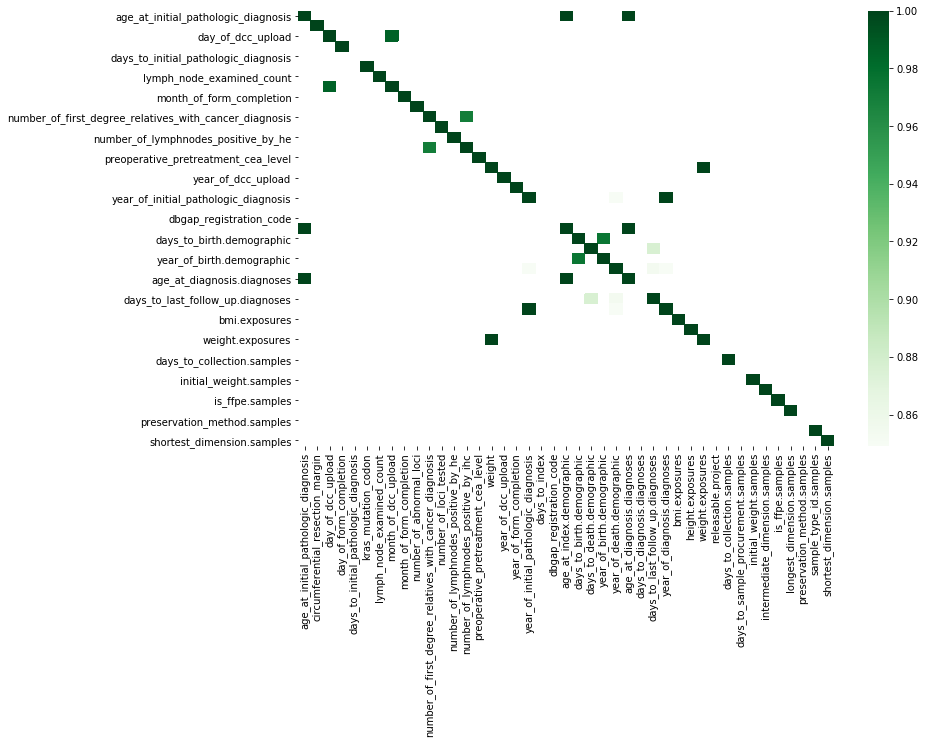

In [9]:
# view only high correlations
corr =data1.corr()
kot = corr[corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [10]:
# High correlations in table
kot = corr[corr>=.8]
kot

age_at_initial_pathologic_diagnosis  \
age_at_initial_pathologic_diagnosis                                            1.000000   
circumferential_resection_margin                                                    NaN   
day_of_dcc_upload                                                                   NaN   
day_of_form_completion                                                              NaN   
days_to_initial_pathologic_diagnosis                                                NaN   
kras_mutation_codon                                                                 NaN   
lymph_node_examined_count                                                           NaN   
month_of_dcc_upload                                                                 NaN   
month_of_form_completion                                                            NaN   
number_of_abnormal_loci                                                             NaN   
number_of_first_degree_relatives_with_cancer_di...                                  NaN   
number_of_loci_tested                                                               NaN   
number_of_lymphnodes_positive_by_he                                                 NaN   
number_of_lymphnodes_positive_by_ihc                                                NaN   
preoperative_pretreatment_cea_level                                                 NaN   
weight                                                                              NaN   
year_of_dcc_upload                                                                  NaN   
year_of_form_completion                                                             NaN   
year_of_initial_pathologic_diagnosis                                                NaN   
days_to_index                                                                       NaN   
dbgap_registration_code                                                             NaN   
age_at_index.demographic                                                       1.000000   
days_to_birth.demographic                                                           NaN   
days_to_death.demographic                                                           NaN   
year_of_birth.demographic                                                           NaN   
year_of_death.demographic                                                           NaN   
age_at_diagnosis.diagnoses                                                     0.999739   
days_to_diagnosis.diagnoses                                                         NaN   
days_to_last_follow_up.diagnoses                                                    NaN   
year_of_diagnosis.diagnoses                                                         NaN   
bmi.exposures                                                                       NaN   
height.exposures                                                                    NaN   
weight.exposures                                                                    NaN   
releasable.project                                                                  NaN   
days_to_collection.samples                                                          NaN   
days_to_sample_procurement.samples                                                  NaN   
initial_weight.samples                                                              NaN   
intermediate_dimension.samples                                                      NaN   
is_ffpe.samples                                                                     NaN   
longest_dimension.samples                                                           NaN   
preservation_method.samples                                                         NaN   
sample_type_id.samples                                                              NaN   
shortest_dimension.samples                                                          NaN   

                                               

In [11]:
# Lets explore some of the categorical varibales that can be used as a reponse variable for our prediction model
data1['person_neoplasm_cancer_status'].value_counts().to_frame()

person_neoplasm_cancer_status
TUMOR FREE                            345
WITH TUMOR                             92

In [12]:
# Lets explore some of the categorical varibales that can be used as a reponse variable for our prediction model
data1['primary_therapy_outcome_success'].value_counts().to_frame()

primary_therapy_outcome_success
Complete Remission/Response                              159
Progressive Disease                                       29
Partial Remission/Response                                16
Stable Disease                                             4

In [13]:
# Lets explore some of the categorical varibales that can be used as a reponse variable for our prediction model
data1['synchronous_colon_cancer_present'].value_counts().to_frame()

synchronous_colon_cancer_present
NO                                485
YES                                30

In [14]:
# Lets explore some of the categorical varibales that can be used as a reponse variable for our prediction model
data1['disease_type'].value_counts().to_frame()

disease_type
Adenomas and Adenocarcinomas                    490
Cystic, Mucinous and Serous Neoplasms            78
Complex Epithelial Neoplasms                      2
Epithelial Neoplasms, NOS                         1

In [15]:
# Lets explore some of the categorical varibales that can be used as a reponse variable for our prediction model
data1['sample_type.samples'].value_counts().to_frame()

sample_type.samples
Primary Tumor                        475
Solid Tissue Normal                   93
Metastatic                             2
Recurrent Tumor                        1

In [16]:
# Lets explore the average value of variables for this grouping  
average = data1.groupby(['person_neoplasm_cancer_status']).mean()
average.head()

age_at_initial_pathologic_diagnosis  \
person_neoplasm_cancer_status                                        
TUMOR FREE                                               66.559420   
WITH TUMOR                                               64.728261   

                               circumferential_resection_margin  \
person_neoplasm_cancer_status                                     
TUMOR FREE                                            23.453409   
WITH TUMOR                                            38.176471   

                               day_of_dcc_upload  day_of_form_completion  \
person_neoplasm_cancer_status                                              
TUMOR FREE                                  22.0               13.940476   
WITH TUMOR                                  22.0               16.230769   

                               days_to_initial_pathologic_diagnosis  \
person_neoplasm_cancer_status                                         
TUMOR FREE                                                      0.0   
WITH TUMOR                                                      0.0   

                               kras_mutation_codon  lymph_node_examined_count  \
person_neoplasm_cancer_status                                                   
TUMOR FREE                                    12.0                  24.927492   
WITH TUMOR                                    12.0                  19.363636   

                               month_of_dcc_upload  month_of_form_completion  \
person_neoplasm_cancer_status                                                  
TUMOR FREE                                    12.0                  7.536232   
WITH TUMOR                                    12.0                  7.195652   

                               number_of_abnormal_loci  \
person_neoplasm_cancer_status                            
TUMOR FREE                                        1.75   
WITH TUMOR                                        0.00   

                               number_of_first_degree_relatives_with_cancer_diagnosis  \
person_neoplasm_cancer_status                                                           
TUMOR FREE                                                              0.223333        
WITH TUMOR                                                              0.179104        

                               number_of_loci_tested  \
person_neoplasm_cancer_status                          
TUMOR FREE                                  4.694444   
WITH TUMOR                                  5.428571   

                               number_of_lymphnodes_positive_by_he  \
person_neoplasm_cancer_status                                        
TUMOR FREE                                                1.139818   
WITH TUMOR                                                5.139535   

                               number_of_lymphnodes_positive_by_ihc  \
person_neoplasm_cancer_status                                         
TUMOR FREE                                                 0.351351   
WITH TUMOR                                                 1.235294   

                               preoperative_pretreatment_cea_level     weight  \
person_neoplasm_cancer_status                                                   
TUMOR FREE                                                8.359433  81.114213   
WITH TUMOR                                              173.069836  84.032759   

                               year_of_dcc_upload  year_of_form_completion  \
person_neoplasm_cancer_status                                                
TUMOR FREE                                 2016.0              2011.730435   
WITH TUMOR                                 2016.0              2012.260870   

                               year_of_initial_pathologic_diagnosis  \
person_neoplasm_cancer_status                                         
TUMOR FREE                                              2008.521739   
WITH TUMOR   

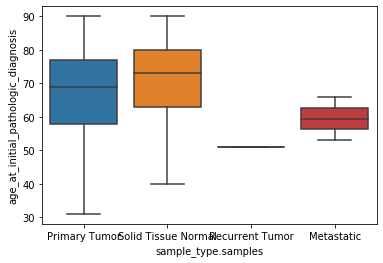

In [17]:
# box plot

sns.boxplot(x= "sample_type.samples", y= "age_at_initial_pathologic_diagnosis", data= data1)

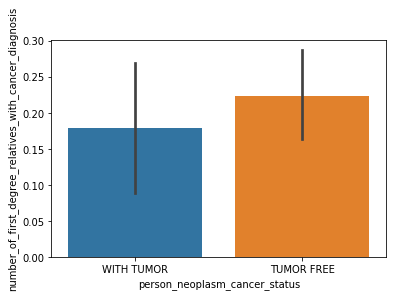

In [18]:
# bar plot

sns.barplot(x= "person_neoplasm_cancer_status", y= "number_of_first_degree_relatives_with_cancer_diagnosis", data= data1)

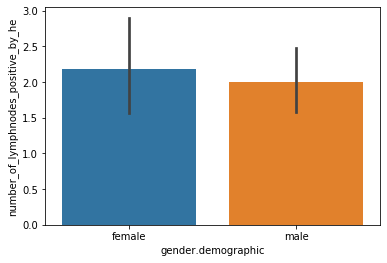

In [19]:
# bar plot

sns.barplot(x= "gender.demographic", y= "number_of_lymphnodes_positive_by_he", data= data1)

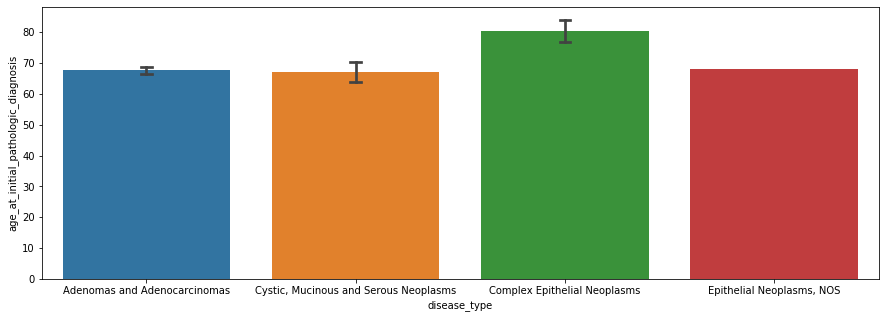

In [20]:
# bar plot

plt.subplots(figsize = (15,5))
ax = sns.barplot(x = "disease_type", 
                 y = "age_at_initial_pathologic_diagnosis", 
                 data = data1, 
                 linewidth=5,
                 capsize = .05,
                )

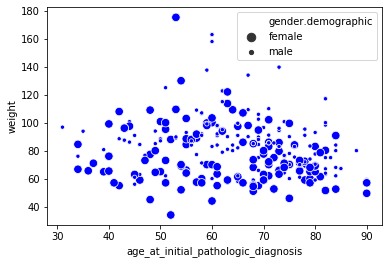

In [21]:
# scatter plot

sns.scatterplot(x="age_at_initial_pathologic_diagnosis", y="weight", color= "blue", size="gender.demographic", data=data1)

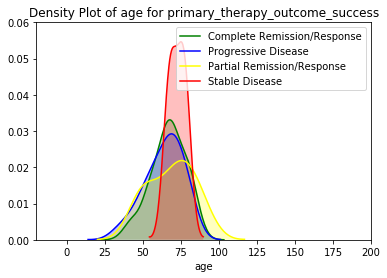

In [22]:
# Kernel Density Estimate Plot

ax = sns.kdeplot(data1["age_at_index.demographic"][data1.primary_therapy_outcome_success == "Complete Remission/Response"], color="green", shade=True)
sns.kdeplot(data1["age_at_index.demographic"][data1.primary_therapy_outcome_success == "Progressive Disease"], color="blue", shade=True)
sns.kdeplot(data1["age_at_index.demographic"][data1.primary_therapy_outcome_success == "Partial Remission/Response"], color="yellow", shade=True)
sns.kdeplot(data1["age_at_index.demographic"][data1.primary_therapy_outcome_success == "Stable Disease"], color="red", shade=True)
plt.legend(['Complete Remission/Response', 'Progressive Disease', 'Partial Remission/Response', 'Stable Disease'])
plt.title('Density Plot of age for primary_therapy_outcome_success')
ax.set(xlabel='age')
plt.xlim(-20,200)
plt.ylim(0, 0.06)
plt.show()

In [23]:
# explore null values
data1.isnull()

submitter_id.samples  age_at_initial_pathologic_diagnosis  batch_number  \
0                   False                                False         False   
1                   False                                False         False   
2                   False                                False         False   
3                   False                                False         False   
4                   False                                False         False   
..                    ...                                  ...           ...   
566                 False                                False         False   
567                 False                                False         False   
568                 False                                False         False   
569                 False                                 True         False   
570                 False                                 True         False   

       bcr  bcr_followup_barcode  bcr_followup_uuid  submitter_id  \
0    False                 False              False         False   
1    False                 False              False         False   
2    False                 False              False         False   
3    False                 False              False         False   
4    False                 False              False         False   
..     ...                   ...                ...           ...   
566  False                 False              False         False   
567  False                 False              False         False   
568  False                 False              False         False   
569  False                  True               True         False   
570  False                  True               True         False   

     braf_gene_analysis_performed  braf_gene_analysis_result  \
0                           False                       True   
1                           False                       True   
2                           False                       True   
3                           False                       True   
4                            True                       True   
..                            ...                        ...   
566                          True                       True   
567                         False                       True   
568                         False                       True   
569                          True                       True   
570                          True                       True   

     circumferential_resection_margin  colon_polyps_present  date_of_withdraw  \
0                                True                 False              True   
1                                True                 False              True   
2                                True                 False              True   
3                                True                  True              True   
4                                True                 False              True   
..                                ...                   ...               ...   
566                              True                  True              True   
567                             False                 False              True   
568                             False                  True              True   
569                              True                  True              True   
570                              True                  True              True   

     day_of_dcc_upload  day_of_form_completion  \
0                False                   False   
1                False                   False   
2                False                   False   
3                False                   False   
4                False                   False   
..                 ...                     ...   
566              False                   False   
567              False                   False   
568              False 

In [24]:
# finding percent of missing values
data1.isnull().mean().sort_values(ascending = False).round(4) * 100

preservation_method.samples           100.00
days_to_sample_procurement.samples    100.00
reason_for_withdraw                    99.82
date_of_withdraw                       99.82
kras_mutation_codon                    95.62
                                       ...  
disease_code                            0.00
state.samples                           0.00
year_of_dcc_upload                      0.00
tissue_source_site                      0.00
submitter_id.samples                    0.00
Length: 120, dtype: float64

In [25]:
# defining a function to find total & percent of missing values of the data1

def missing(data1):
    total = data1.isnull().sum().sort_values(ascending = False)
    percent = round(data1.isnull().sum().sort_values(ascending = False)/len(data1)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [26]:
pd.set_option("max_rows", None)
missing(data1)

Total  Percent
preservation_method.samples                           571   100.00
days_to_sample_procurement.samples                    571   100.00
reason_for_withdraw                                   570    99.82
date_of_withdraw                                      570    99.82
kras_mutation_codon                                   546    95.62
braf_gene_analysis_result                             540    94.57
kras_mutation_found                                   518    90.72
number_of_lymphnodes_positive_by_ihc                  512    89.67
number_of_abnormal_loci                               504    88.27
number_of_loci_tested                                 504    88.27
year_of_death.demographic                             502    87.92
circumferential_resection_margin                      498    87.22
dbgap_registration_code                               492    86.16
program                                               492    86.16
microsatellite_instability                            459    80.39
initial_weight.samples                                449    78.63
days_to_death.demographic                             444    77.76
days_to_collection.samples                            441    77.23
oct_embedded.samples                                  439    76.88
perineural_invasion_present                           370    64.80
followup_treatment_success                            369    64.62
primary_therapy_outcome_success                       363    63.57
lost_follow_up                                        305    53.42
non_nodal_tumor_deposits                              290    50.79
colon_polyps_present                                  289    50.61
height.exposures                                      285    49.91
bmi.exposures                                         285    49.91
weight.exposures                                      264    46.23
weight                                                264    46.23
preoperative_pretreatment_cea_level                   193    33.80
followup_case_report_form_submission_reason           184    32.22
loss_expression_of_mismatch_repair_proteins_by_ihc    150    26.27
intermediate_dimension.samples                        136    23.82
longest_dimension.samples                             136    23.82
shortest_dimension.samples                            136    23.82
person_neoplasm_cancer_status                         134    23.47
pathology_report_file_name                             93    16.29
history_of_colon_polyps                                87    15.24
radiation_therapy                                      86    15.06
postoperative_rx_tx                                    84    14.71
venous_invasion                                        82    14.36
number_of_first_degree_relatives_with_cancer_di...     79    13.84
system_version                                         73    12.78
braf_gene_analysis_performed                           62    10.86
days_to_last_follow_up.diagnoses                       62    10.86
day_of_form_completion                                 61    10.68
lymphatic_invasion                                     60    10.51
synchronous_colon_cancer_present                       56     9.81
year_of_form_completion                                51     8.93
month_of_form_completion                               51     8.93
bcr_followup_barcode                                   51     8.93
bcr_followup_uuid                                      51     8.93
kras_gene_analysis_performed                           48     8.41
number_of_lymphnodes_positive_by_he                    29     5.08
lymph_node_examined_count                              24     4.20
tissue_prospective_collection_indicator                16     2.80
tissue_retrospective_collection_indicator              16     2.80
primary_lymph_node_presentation_assessment             12     2.10
pathologic_M                                           10     1.75
days_to_birth.demographic       

In [27]:
# dropping columns (features) with more than 80% missing values
data1.dropna(thresh=80, axis=1, inplace =True)
missing(data1)

Total  Percent
microsatellite_instability                            459    80.39
initial_weight.samples                                449    78.63
days_to_death.demographic                             444    77.76
days_to_collection.samples                            441    77.23
oct_embedded.samples                                  439    76.88
perineural_invasion_present                           370    64.80
followup_treatment_success                            369    64.62
primary_therapy_outcome_success                       363    63.57
lost_follow_up                                        305    53.42
non_nodal_tumor_deposits                              290    50.79
colon_polyps_present                                  289    50.61
bmi.exposures                                         285    49.91
height.exposures                                      285    49.91
weight                                                264    46.23
weight.exposures                                      264    46.23
preoperative_pretreatment_cea_level                   193    33.80
followup_case_report_form_submission_reason           184    32.22
loss_expression_of_mismatch_repair_proteins_by_ihc    150    26.27
intermediate_dimension.samples                        136    23.82
longest_dimension.samples                             136    23.82
shortest_dimension.samples                            136    23.82
person_neoplasm_cancer_status                         134    23.47
pathology_report_file_name                             93    16.29
history_of_colon_polyps                                87    15.24
radiation_therapy                                      86    15.06
postoperative_rx_tx                                    84    14.71
venous_invasion                                        82    14.36
number_of_first_degree_relatives_with_cancer_di...     79    13.84
system_version                                         73    12.78
days_to_last_follow_up.diagnoses                       62    10.86
braf_gene_analysis_performed                           62    10.86
day_of_form_completion                                 61    10.68
lymphatic_invasion                                     60    10.51
synchronous_colon_cancer_present                       56     9.81
year_of_form_completion                                51     8.93
bcr_followup_uuid                                      51     8.93
bcr_followup_barcode                                   51     8.93
month_of_form_completion                               51     8.93
kras_gene_analysis_performed                           48     8.41
number_of_lymphnodes_positive_by_he                    29     5.08
lymph_node_examined_count                              24     4.20
tissue_retrospective_collection_indicator              16     2.80
tissue_prospective_collection_indicator                16     2.80
primary_lymph_node_presentation_assessment             12     2.10
pathologic_M                                           10     1.75
age_at_diagnosis.diagnoses                              4     0.70
days_to_birth.demographic                               4     0.70
pathologic_T                                            2     0.35
withdrawn                                               2     0.35
informed_consent_verified                               2     0.35
other_dx                                                2     0.35
year_of_initial_pathologic_diagnosis                    2     0.35
pathologic_N                                            2     0.35
days_to_index                                           2     0.35
history_of_neoadjuvant_treatment                        2     0.35
prior_treatment.diagnoses                               2     0.35
age_at_initial_pathologic_diagnosis                     2     0.35
days_to_initial_pathologic_diagnosis                    2     0.35
alcohol_history.exposures                               2     0.35
year_of_diagnosis.diagnoses     

In [28]:
data1.dtypes

submitter_id.samples                                       object
age_at_initial_pathologic_diagnosis                       float64
batch_number                                               object
bcr                                                        object
bcr_followup_barcode                                       object
bcr_followup_uuid                                          object
submitter_id                                               object
braf_gene_analysis_performed                               object
colon_polyps_present                                       object
day_of_dcc_upload                                           int64
day_of_form_completion                                    float64
days_to_initial_pathologic_diagnosis                      float64
file_uuid                                                  object
followup_case_report_form_submission_reason                object
followup_treatment_success                                 object
history_of

In [29]:
# Viewing all the columns to see all the column names
pd.set_option("max_columns", None)
data1

submitter_id.samples  age_at_initial_pathologic_diagnosis batch_number  \
0       TCGA-F4-6460-01A                                 51.0     123.74.0   
1       TCGA-A6-3807-01A                                 53.0      41.78.0   
2       TCGA-A6-3807-11A                                 53.0      41.78.0   
3       TCGA-AA-A01C-01A                                 75.0      33.79.0   
4       TCGA-A6-A566-01A                                 55.0     300.56.0   
5       TCGA-AA-3870-01A                                 71.0      41.78.0   
6       TCGA-AA-3715-01A                                 77.0      36.83.0   
7       TCGA-AZ-6600-01A                                 64.0     123.74.0   
8       TCGA-AZ-6600-11A                                 64.0     123.74.0   
9       TCGA-AA-3968-01A                                 55.0      41.78.0   
10      TCGA-A6-2671-01A                                 85.0      76.78.0   
11      TCGA-A6-2671-11A                                 85.0      76.78.0   
12      TCGA-AY-A71X-01A                                 54.0     385.43.0   
13      TCGA-AA-3532-01A                                 63.0      28.86.0   
14      TCGA-AA-3532-11A                                 63.0      28.86.0   
15      TCGA-A6-5662-01A                                 46.0      89.77.0   
16      TCGA-A6-5662-11A                                 46.0      89.77.0   
17      TCGA-AA-3696-01A                                 75.0      36.83.0   
18      TCGA-CA-5254-01A                                 42.0     138.78.0   
19      TCGA-AA-3858-01A                                 67.0      36.83.0   
20      TCGA-A6-6782-01A                                 82.0     138.78.0   
21      TCGA-D5-6537-01A                                 64.0     116.77.0   
22      TCGA-A6-2685-01A                                 48.0      76.78.0   
23      TCGA-A6-2685-11A                                 48.0      76.78.0   
24      TCGA-AA-3680-01A                                 67.0      36.83.0   
25      TCGA-AZ-6605-01A                                 77.0     138.78.0   
26      TCGA-AZ-6605-11A                                 77.0     138.78.0   
27      TCGA-AA-A02O-01A                                 82.0      66.81.0   
28      TCGA-AA-A02O-11A                                 82.0      66.81.0   
29      TCGA-CA-6716-01A                                 65.0     138.78.0   
30      TCGA-AA-3534-01A                                 78.0      28.86.0   
31      TCGA-AA-3534-11A                                 78.0      28.86.0   
32      TCGA-AA-A00F-01A                                 66.0      30.80.0   
33      TCGA-AA-3860-01A                                 53.0      36.83.0   
34      TCGA-NH-A50U-01A                                 42.0     385.43.0   
35      TCGA-F4-6809-01A                                 52.0     138.78.0   
36      TCGA-AA-3516-01A                                 74.0      29.82.0   
37      TCGA-AA-3516-11A                                 74.0      29.82.0   
38      TCGA-AA-3975-01A                                 80.0      41.78.0   
39      TCGA-G4-6315-01A                                 66.0     116.77.0   
40      TCGA-CK-4951-01A                                 79.0      76.78.0   
41      TCGA-AA-3548-01A                                 71.0      28.86.0   
42      TCGA-AA-A00R-01A                                 64.0      30.80.0   
43      TCGA-G4-6317-01A                                 51.0     116.77.0   
44      TCGA-G4-6317-02A                                 51.0     116.77.0   
45      TCGA-F4-6704-01A                                 60.0     138.78.0   
46      TCGA-F4-6704-11A                                 60.0     138.78.0   
47      TCGA-DM-A1D8-01A                                 50.0     132.71.0   
48      TCGA-D5-5537-01A                                 83.0     157.71.0   
49      TCGA-AU-6004-01A                                 69.0     116.77.0   
50      TCGA-A6-2681-01A  

In [30]:
# Lets select some features that we want to use for predicting:'person_neoplasm_cancer_status'(Tumor/Tumor_Free) 

data2 = data1[['person_neoplasm_cancer_status', 'age_at_index.demographic', 'number_of_first_degree_relatives_with_cancer_diagnosis', 'gender.demographic', 'race.demographic', 'alcohol_history.exposures', 'height.exposures', 'weight.exposures', 'bmi.exposures', 'ethnicity.demographic' ]]
missing(data2)

# Other features that can be used as response variable for future prediction models:
#'primary_therapy_outcome_success', 'synchronous_colon_cancer_present', 'disease_type', 'sample_type.samples', 'vital_status.demographic'

Total  Percent
bmi.exposures                                         285    49.91
height.exposures                                      285    49.91
weight.exposures                                      264    46.23
person_neoplasm_cancer_status                         134    23.47
number_of_first_degree_relatives_with_cancer_di...     79    13.84
ethnicity.demographic                                   2     0.35
alcohol_history.exposures                               2     0.35
race.demographic                                        2     0.35
gender.demographic                                      2     0.35
age_at_index.demographic                                2     0.35

In [31]:
# lets make a new dataframe from data2 so we can perform future analysis on that
data2 = pd.DataFrame(data=data2)
data2

person_neoplasm_cancer_status  age_at_index.demographic  \
0                      WITH TUMOR                      51.0   
1                      TUMOR FREE                      53.0   
2                      TUMOR FREE                      53.0   
3                      TUMOR FREE                      75.0   
4                      WITH TUMOR                      55.0   
5                      TUMOR FREE                      71.0   
6                             NaN                      77.0   
7                      WITH TUMOR                      64.0   
8                      WITH TUMOR                      64.0   
9                      TUMOR FREE                      55.0   
10                     WITH TUMOR                      85.0   
11                     WITH TUMOR                      85.0   
12                     TUMOR FREE                      54.0   
13                            NaN                      63.0   
14                            NaN                      63.0   
15                     WITH TUMOR                      46.0   
16                     WITH TUMOR                      46.0   
17                            NaN                      75.0   
18                     TUMOR FREE                      42.0   
19                     TUMOR FREE                      67.0   
20                     TUMOR FREE                      82.0   
21                     WITH TUMOR                      64.0   
22                     TUMOR FREE                      48.0   
23                     TUMOR FREE                      48.0   
24                     WITH TUMOR                      67.0   
25                     TUMOR FREE                      77.0   
26                     TUMOR FREE                      77.0   
27                            NaN                      82.0   
28                            NaN                      82.0   
29                     TUMOR FREE                      65.0   
30                     TUMOR FREE                      78.0   
31                     TUMOR FREE                      78.0   
32                     TUMOR FREE                      66.0   
33                     TUMOR FREE                      53.0   
34                            NaN                      42.0   
35                     WITH TUMOR                      52.0   
36                            NaN                      74.0   
37                            NaN                      74.0   
38                     TUMOR FREE                      80.0   
39                     TUMOR FREE                      66.0   
40                     TUMOR FREE                      79.0   
41                     TUMOR FREE                      71.0   
42                            NaN                      64.0   
43                     TUMOR FREE                      51.0   
44                     TUMOR FREE                      51.0   
45                            NaN                      60.0   
46                            NaN                      60.0   
47                            NaN                      50.0   
48                     WITH TUMOR                      83.0   
49                            NaN                      69.0   
50                     TUMOR FREE                      73.0   
51                     TUMOR FREE                      73.0   
52                     TUMOR FREE                      70.0   
53                     WITH TUMOR                      47.0   
54                     WITH TUMOR                      47.0   
55                     WITH TUMOR                      76.0   
56                     WITH TUMOR                      76.0   
57                            NaN                      74.0   
58                            NaN                      84.0   
59                     TUMOR FREE                      82.0   
60                            NaN                      81.0   
61                     TUMOR FREE                      70.0   
62                     WITH TUMOR  

In [32]:
# correlations
data2.corr()

age_at_index.demographic  \
age_at_index.demographic                                            1.000000   
number_of_first_degree_relatives_with_cancer_di...                 -0.055312   
height.exposures                                                   -0.054869   
weight.exposures                                                   -0.173870   
bmi.exposures                                                      -0.101812   

                                                    number_of_first_degree_relatives_with_cancer_diagnosis  \
age_at_index.demographic                                                                    -0.055312        
number_of_first_degree_relatives_with_cancer_di...                                           1.000000        
height.exposures                                                                             0.003254        
weight.exposures                                                                            -0.067381        
bmi.exposures                                                                               -0.053447        

                                                    height.exposures  \
age_at_index.demographic                                   -0.054869   
number_of_first_degree_relatives_with_cancer_di...          0.003254   
height.exposures                                            1.000000   
weight.exposures                                            0.147493   
bmi.exposures                                              -0.559649   

                                                    weight.exposures  \
age_at_index.demographic                                   -0.173870   
number_of_first_degree_relatives_with_cancer_di...         -0.067381   
height.exposures                                            0.147493   
weight.exposures                                            1.000000   
bmi.exposures                                               0.581197   

                                                    bmi.exposures  
age_at_index.demographic                                -0.101812  
number_of_first_degree_relatives_with_cancer_di...      -0.053447  
height.exposures                                        -0.559649  
weight.exposures                                         0.581197  
bmi.exposures                                            1.000000

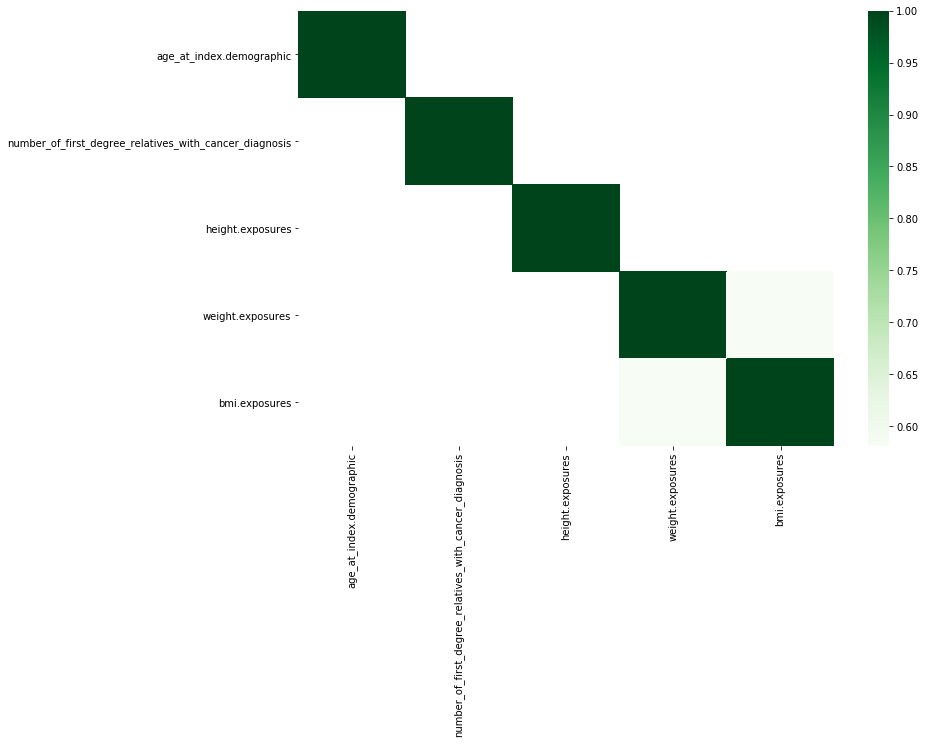

In [33]:
# view only high correlations
corr =data2.corr()
kot = corr[corr>=.4]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

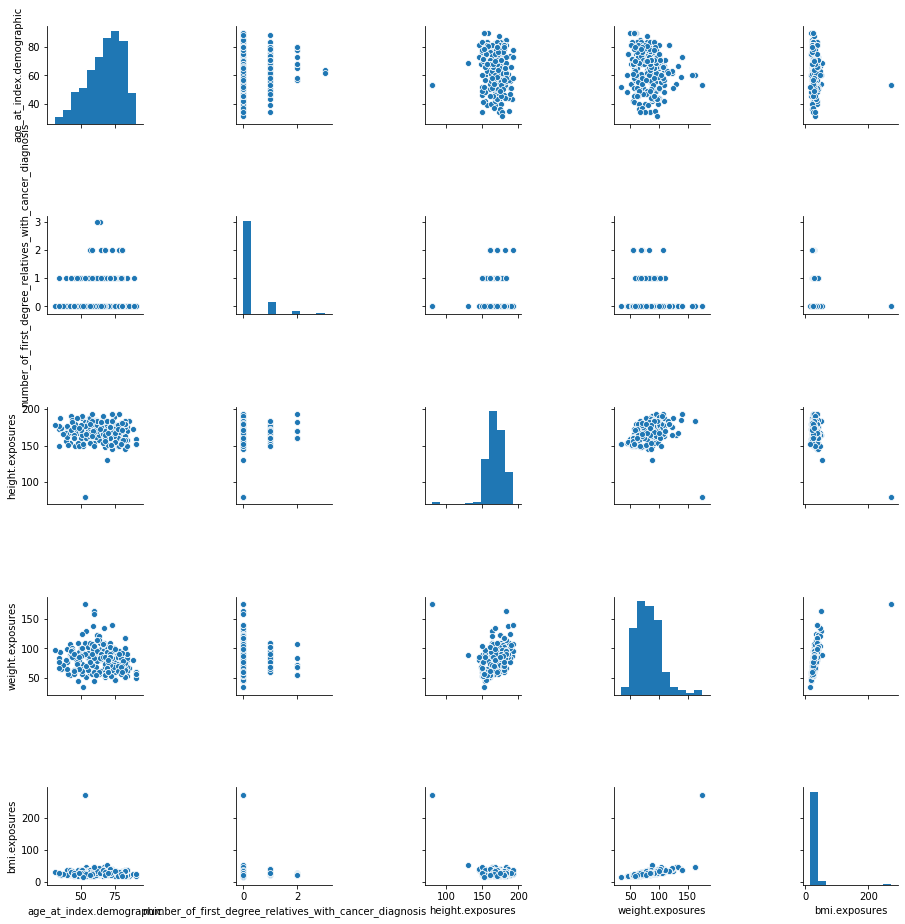

In [34]:
#Distribution pair plots of data2
sns.pairplot(data2, kind="scatter")
plt.show()

In [35]:
data2.dtypes

person_neoplasm_cancer_status                              object
age_at_index.demographic                                  float64
number_of_first_degree_relatives_with_cancer_diagnosis    float64
gender.demographic                                         object
race.demographic                                           object
alcohol_history.exposures                                  object
height.exposures                                          float64
weight.exposures                                          float64
bmi.exposures                                             float64
ethnicity.demographic                                      object
dtype: object

In [36]:
# Since we want to do analysis & prediction on this variable, we will drop any row that doesn't have any record for it
data2.dropna(subset=['person_neoplasm_cancer_status'], axis=0, inplace=True)
missing(data2)

Total  Percent
bmi.exposures                                         192    43.94
height.exposures                                      192    43.94
weight.exposures                                      172    39.36
number_of_first_degree_relatives_with_cancer_di...     70    16.02
ethnicity.demographic                                   0     0.00
alcohol_history.exposures                               0     0.00
race.demographic                                        0     0.00
gender.demographic                                      0     0.00
age_at_index.demographic                                0     0.00
person_neoplasm_cancer_status                           0     0.00

In [37]:
# Now lets fill in missing values of other variables for prediction with their average value  

mean_bmi =data2['bmi.exposures'].mean()
data2['bmi.exposures']= data2['bmi.exposures'].replace(np.nan, mean_bmi)

mean_weight =data2['weight.exposures'].mean()
data2['weight.exposures']= data2['weight.exposures'].replace(np.nan, mean_weight)

mean_height =data2['height.exposures'].mean()
data2['height.exposures']= data2['height.exposures'].replace(np.nan, mean_height)

mean_relatives =data2['number_of_first_degree_relatives_with_cancer_diagnosis'].mean()
data2['number_of_first_degree_relatives_with_cancer_diagnosis']= data2['number_of_first_degree_relatives_with_cancer_diagnosis'].replace(np.nan, mean_relatives)

In [38]:
# check the missing values again
missing(data2)

Total  Percent
ethnicity.demographic                                   0      0.0
bmi.exposures                                           0      0.0
weight.exposures                                        0      0.0
height.exposures                                        0      0.0
alcohol_history.exposures                               0      0.0
race.demographic                                        0      0.0
gender.demographic                                      0      0.0
number_of_first_degree_relatives_with_cancer_di...      0      0.0
age_at_index.demographic                                0      0.0
person_neoplasm_cancer_status                           0      0.0

In [39]:
# Transforming some of the object variables to category variables so we can incode them later 

data2["person_neoplasm_cancer_status"] = data2["person_neoplasm_cancer_status"].astype('category')
data2["gender.demographic"] = data2["gender.demographic"].astype('category')
data2["race.demographic"] = data2["race.demographic"].astype('category')
data2["alcohol_history.exposures"] = data2["alcohol_history.exposures"].astype('category')
data2["ethnicity.demographic"] = data2["ethnicity.demographic"].astype('category')

data2.dtypes

# transforming for future response variables 
#data1["disease_type"] = data1["disease_type"].astype('category')
#data1["primary_therapy_outcome_success"] = data1["primary_therapy_outcome_success"].astype('category')
#data1["sample_type.samples"] = data1["sample_type.samples"].astype('category')
#data1["synchronous_colon_cancer_present"] = data1["synchronous_colon_cancer_present"].astype('category')

person_neoplasm_cancer_status                             category
age_at_index.demographic                                   float64
number_of_first_degree_relatives_with_cancer_diagnosis     float64
gender.demographic                                        category
race.demographic                                          category
alcohol_history.exposures                                 category
height.exposures                                           float64
weight.exposures                                           float64
bmi.exposures                                              float64
ethnicity.demographic                                     category
dtype: object

In [40]:
# incoding category variables 

data2['person_neoplasm_cancer_status'] = data2['person_neoplasm_cancer_status'].cat.codes
data2['gender.demographic'] = data2['gender.demographic'].cat.codes
data2['race.demographic'] = data2['race.demographic'].cat.codes
data2['ethnicity.demographic'] = data2['ethnicity.demographic'].cat.codes
data2['alcohol_history.exposures'] = data2['alcohol_history.exposures'].cat.codes

# future variables incoding
#data1['primary_therapy_outcome_success'] = data1['primary_therapy_outcome_success'].cat.codes
#data1['disease_type'] = data1['disease_type'].cat.codes
#data1['sample_type.samples'] = data1['sample_type.samples'].cat.codes

# another way for incoding
#pd.get_dummies(data2)

In [100]:
#seperate your class

with_tumor = data2[data2['person_neoplasm_cancer_status']== 1]
tumor_free = data2[data2['person_neoplasm_cancer_status']== 0]

In [42]:
#take the same number of samples for each class

with_tumor = with_tumor.sample(80, replace=False)
tumor_free = tumor_free.sample(80, replace=False)

In [43]:
#concat these data frames

clinical_subset = pd.concat([tumor_free, with_tumor])
clinical_subset

person_neoplasm_cancer_status  age_at_index.demographic  \
474                              0                      82.0   
538                              0                      70.0   
164                              0                      76.0   
507                              0                      78.0   
451                              0                      75.0   
547                              0                      79.0   
439                              0                      43.0   
408                              0                      51.0   
250                              0                      84.0   
559                              0                      66.0   
1                                0                      53.0   
245                              0                      69.0   
361                              0                      80.0   
275                              0                      65.0   
404                              0                      82.0   
380                              0                      67.0   
420                              0                      84.0   
516                              0                      53.0   
390                              0                      80.0   
32                               0                      66.0   
332                              0                      71.0   
407                              0                      63.0   
403                              0                      82.0   
271                              0                      63.0   
132                              0                      72.0   
402                              0                      82.0   
184                              0                      58.0   
300                              0                      83.0   
296                              0                      65.0   
112                              0                      84.0   
561                              0                      77.0   
122                              0                      60.0   
412                              0                      81.0   
209                              0                      77.0   
144                              0                      65.0   
276                              0                      65.0   
253                              0                      70.0   
181                              0                      62.0   
488                              0                      45.0   
198                              0                      64.0   
435                              0                      81.0   
40                               0                      79.0   
51                               0                      73.0   
398                              0                      34.0   
384                              0                      58.0   
277                              0                      57.0   
76                               0                      55.0   
532                              0                      68.0   
513                              0                      60.0   
485                              0                      85.0   
392                              0                      47.0   
438                              0                      59.0   
354                              0                      71.0   
511                              0                      90.0   
536                              0                      71.0   
106                              0                      70.0   
182                              0                      62.0   
149                              0                      75.0   
235                              0                      60.0   
249                              0                      84.0   
550                              0                      45.0   
97                               0   

In [44]:
# removing weight from tumor prediction model, could improve the accuracy a bit!

X = np.asarray(clinical_subset[['age_at_index.demographic', 'number_of_first_degree_relatives_with_cancer_diagnosis',
                                'gender.demographic', 'race.demographic', 'alcohol_history.exposures', 'height.exposures', 
                                'bmi.exposures', 'ethnicity.demographic']])
X[0:5]

array([[ 82.        ,   0.        ,   1.        ,   3.        ,
          0.        , 180.        ,  36.14197531,   1.        ],
       [ 70.        ,   0.        ,   0.        ,   3.        ,
          0.        , 167.        ,  28.68514468,   1.        ],
       [ 76.        ,   1.        ,   1.        ,   0.        ,
          0.        , 168.18416327,  30.57664043,   2.        ],
       [ 78.        ,   0.        ,   1.        ,   3.        ,
          0.        , 169.        ,  31.86162949,   1.        ],
       [ 75.        ,   0.        ,   0.        ,   2.        ,
          0.        , 168.18416327,  30.57664043,   2.        ]])

In [45]:
# Normalizing X to see if it will increase accuracy 

#X_normalized = preprocessing.normalize(X, norm='l2')
#X_normalized

# result: decreased accuracy!!

In [46]:
y = np.asarray(clinical_subset['person_neoplasm_cancer_status']) 
y[0:5]

array([0, 0, 0, 0, 0], dtype=int8)

In [99]:
clinical_subset['person_neoplasm_cancer_status'].value_counts().to_frame()

person_neoplasm_cancer_status
1                             80
0                             80

In [101]:
# set seed
import random
random.seed(30)

# Create train & test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (128, 8) (128,)
Test set: (32, 8) (32,)


In [49]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int8)

In [51]:
myy = LR.predict(X_train)
myy

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int8)

In [52]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.50390897, 0.49609103],
       [0.52226426, 0.47773574],
       [0.45966555, 0.54033445],
       [0.50111992, 0.49888008],
       [0.48253435, 0.51746565],
       [0.46789716, 0.53210284],
       [0.53058875, 0.46941125],
       [0.41229847, 0.58770153],
       [0.51573158, 0.48426842],
       [0.50372339, 0.49627661],
       [0.48579367, 0.51420633],
       [0.49897705, 0.50102295],
       [0.52315685, 0.47684315],
       [0.46757214, 0.53242786],
       [0.55579381, 0.44420619],
       [0.51914761, 0.48085239],
       [0.46952125, 0.53047875],
       [0.4973466 , 0.5026534 ],
       [0.52859908, 0.47140092],
       [0.46479536, 0.53520464],
       [0.51573158, 0.48426842],
       [0.52822736, 0.47177264],
       [0.45089256, 0.54910744],
       [0.45255353, 0.54744647],
       [0.48749585, 0.51250415],
       [0.43632801, 0.56367199],
       [0.09132934, 0.90867066],
       [0.54510372, 0.45489628],
       [0.53479126, 0.46520874],
       [0.49352959, 0.50647041],
       [0.

In [53]:
# accuracy of test set
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test, yhat))

Accuracy Score: 0.6875


In [54]:
# accuracy of train set
accuracy_score(y_train, myy)

0.5703125

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
cnf_matrix

array([[10,  4],
       [ 6, 12]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

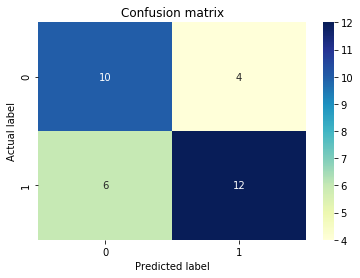

In [61]:
# Heatmap for confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### The above plot shows: True Negative=12, True Positive=6, False Positive=2, Fase Negative=12
##### Since this model was for predicting if a person has Tumor(1) or is Tumor Free(0), it's not good to have 12 False Negatives, because having FN means a person has Tumor but has been predicted as Tumor Free & that's life threatening.  

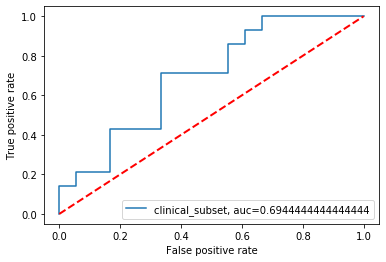

In [63]:
# ROC curve
from sklearn import metrics
yhat_prob = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  yhat_prob)
auc = metrics.roc_auc_score(y_test, yhat_prob)
plt.plot(fpr,tpr,label="clinical_subset, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc=4)
plt.show()

# X lable:  Specificity ( 1-False positive rate)
# Y lable:  Sensitivity (True positive rate)

In [64]:
# AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, yhat_prob)

0.6944444444444444

##### AUC Score = 0.68 is very close to 0.7 and still does not show a very good classifier, maybe our prediction model is classifying 2 separate outcomes randomly. 

In [69]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 15, min_samples_leaf = 3, 
                                       max_depth=3, random_state=0)

# fit the model
clf = clf_gini.fit(X_train, y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(193.15384615384616, 190.26, 'X[2] <= 0.5\ngini = 0.5\nsamples = 128\nvalue = [62, 66]'),
 Text(103.01538461538462, 135.9, 'X[0] <= 57.5\ngini = 0.477\nsamples = 56\nvalue = [34, 22]'),
 Text(51.50769230769231, 81.53999999999999, 'X[5] <= 152.0\ngini = 0.483\nsamples = 22\nvalue = [9, 13]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(154.52307692307693, 81.53999999999999, 'X[5] <= 167.3\ngini = 0.389\nsamples = 34\nvalue = [25, 9]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(283.2923076923077, 135.9, 'X[5] <= 189.0\ngini = 0.475\nsamples = 72\nvalue = [28, 44]'),
 Text(257.53846153846155, 81.53999999999999, 'X[1] <= 0.108\ngini = 0.462\nsamples = 69\nvalue = [25, 44]'),
 Text(231.7846153846

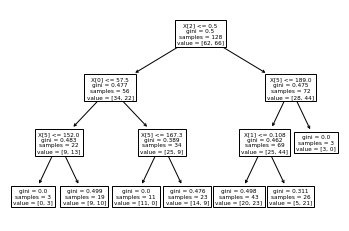

In [70]:
# plot the tree
tree.plot_tree(clf) 

In [72]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int8)

In [75]:
y_pred_gini = clf_gini.predict(X_test)

y_pred_gini

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int8)

In [76]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6250


In [74]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6641


In [77]:
# compare accuracy of train and test to check for overfitting 

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

print('Test: {:.4f}'.format(accuracy_score(y_test, y_pred_gini)))

print('Train: {:.4f}'.format(accuracy_score(y_train, y_pred_train_gini)))

Training set score: 0.6641
Test set score: 0.6250
Test: 0.6250
Train: 0.6641


In [78]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10  8]
 [ 4 10]]


Text(0.5, 15.0, 'Predicted label')

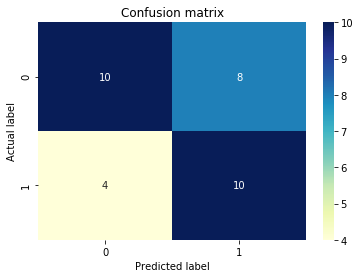

In [79]:
# Heatmap for confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [80]:
# classification report to check the precision, recall and F1-score

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        18
           1       0.56      0.71      0.63        14

    accuracy                           0.62        32
   macro avg       0.63      0.63      0.63        32
weighted avg       0.64      0.62      0.63        32



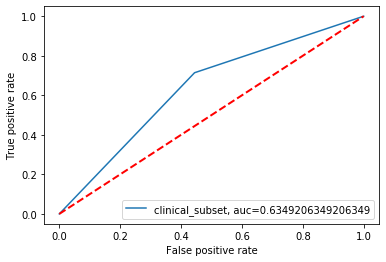

In [81]:
# ROC curve
from sklearn import metrics
#y_pred_gini = clf_gini.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gini)
auc = metrics.roc_auc_score(y_test, y_pred_gini)
plt.plot(fpr,tpr,label="clinical_subset, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc=4)
plt.show()

In [154]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC
from sklearn import svm

clf_svm= svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)
SVC()  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [155]:
y_svm_pred = clf_svm.predict(X_test)
y_svm_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int8)

In [156]:
y_svm_my = clf_svm.predict(X_train)
y_svm_my

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int8)

In [157]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_svm_pred))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_svm_my))

Test Accuracy: 0.59375
Train Accuracy: 0.6171875


In [158]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_svm_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_svm_pred))

Precision: 0.5333333333333333
Recall: 0.5714285714285714


In [159]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_svm_pred)

print('Confusion matrix\n\n', cm_svm)

Confusion matrix

 [[11  7]
 [ 6  8]]


Text(0.5, 15.0, 'Predicted label')

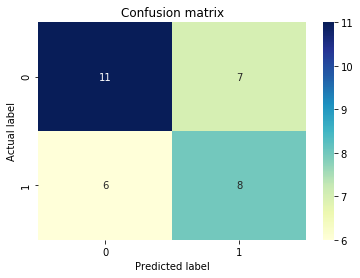

In [160]:
# Heatmap for confusion matrix
sns.heatmap(pd.DataFrame(cm_svm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

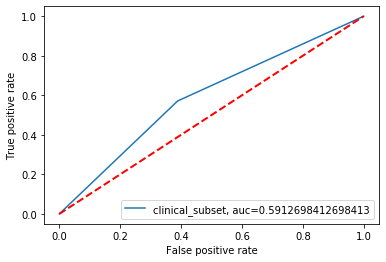

In [161]:
# ROC curve
from sklearn import metrics
#y_pred_gini = clf_gini.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_svm_pred)
auc = metrics.roc_auc_score(y_test, y_svm_pred)
plt.plot(fpr,tpr,label="clinical_subset, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc=4)
plt.show()